# ***Exploratory Data Analysis***

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df = pd.read_csv("insurance.csv")

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.shape

(1338, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df["age"].describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


<Axes: ylabel='age'>

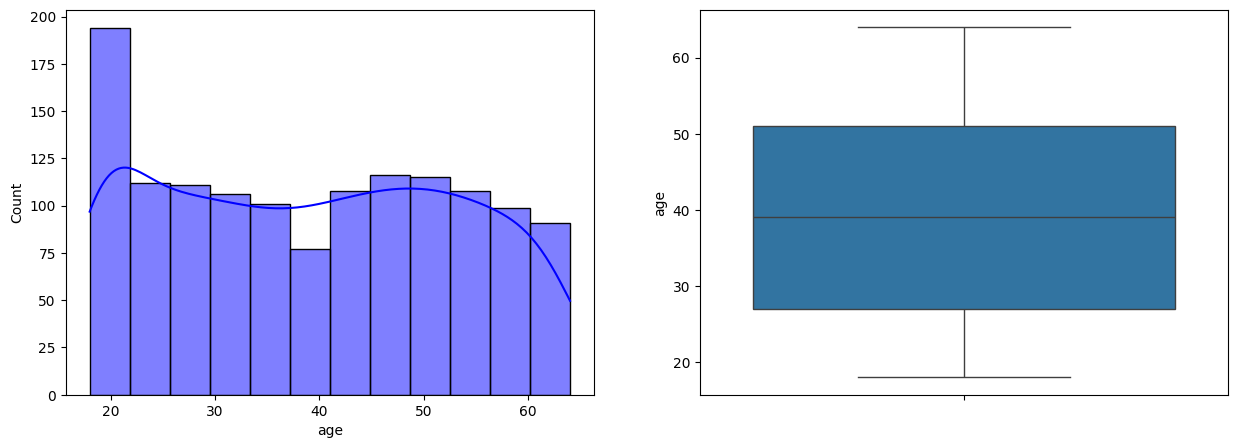

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x = "age",data = df,kde=True,color="b")
plt.subplot(1,2,2)
sns.boxplot(y = "age",data=df)

* The youngest insured person is 18 years old, the oldest is 64.
* The average age is 39, meaning the middle-aged group dominates the dataset.
* The standard deviation is 14, indicating that the majority of insured individuals are between the ages of 25 and 53.
* The age distribution appears balanced; very young and very old individuals are a minority in the dataset.
* The data is fairly evenly distributed.

In [14]:
#Age-Smoke

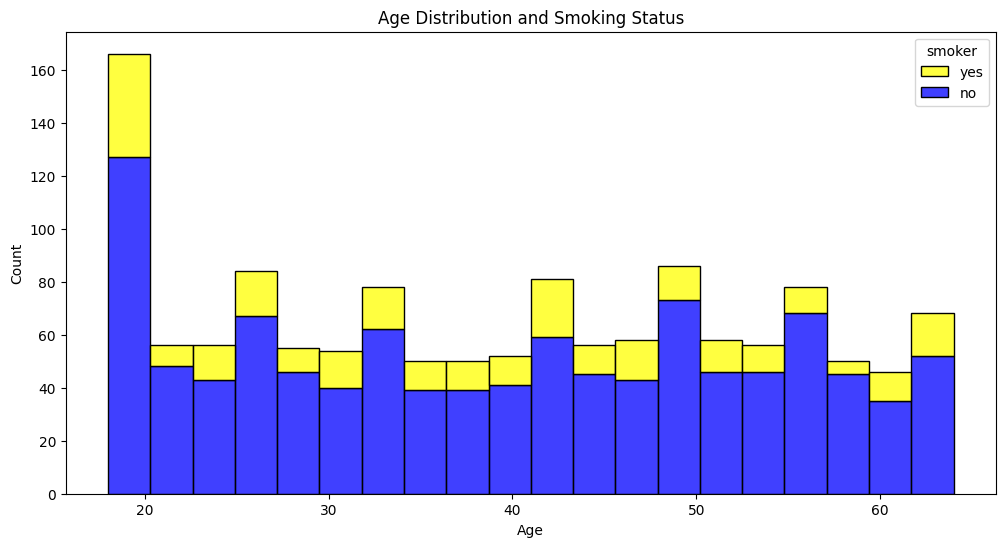

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='age', hue='smoker', multiple='stack', bins=20, palette=['yellow','blue'])
plt.title("Age Distribution and Smoking Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [16]:
#Age-Sex

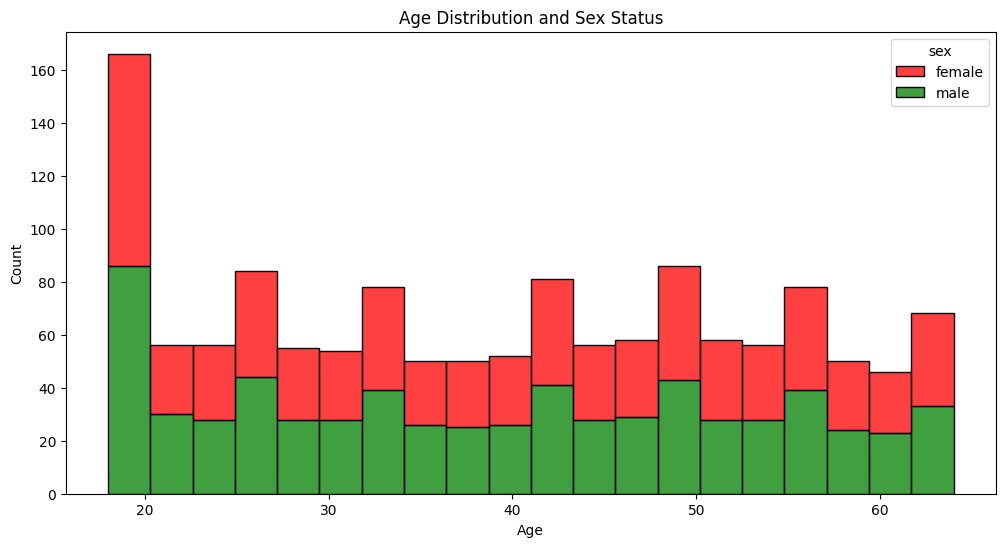

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='age', hue='sex', multiple='stack', bins=20, palette=['red','green'])
plt.title("Age Distribution and Sex Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-1185824262.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "sex",data = df,palette=["red","blue"])


<Axes: xlabel='sex', ylabel='count'>

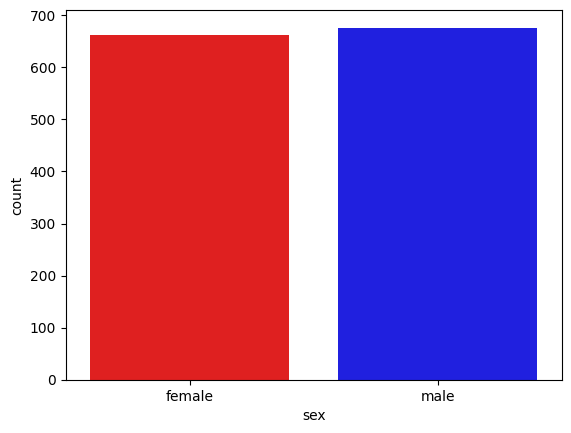

In [43]:
sns.countplot(x = "sex",data = df,palette=["red","blue"])

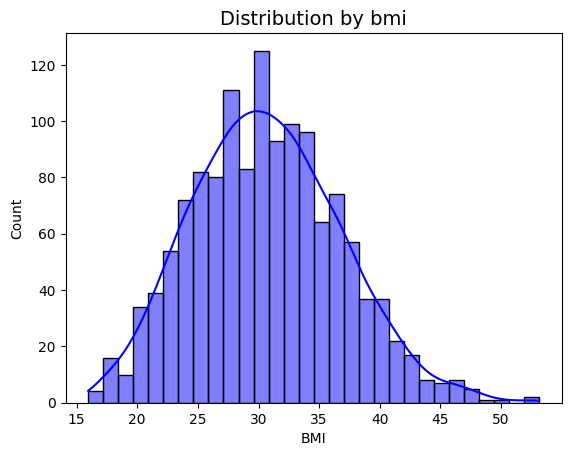

In [52]:
sns.histplot(df["bmi"], bins=30, kde=True, color="blue", edgecolor="black")
plt.title("Distribution by bmi", fontsize=14)
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-2129689355.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="region", data=df, palette="Set2")


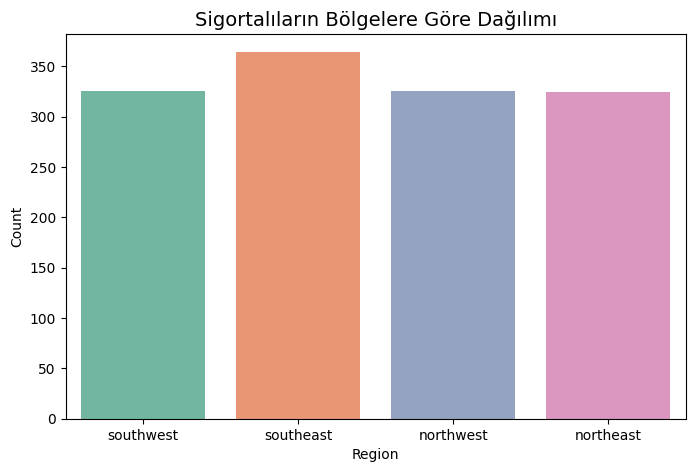

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(x="region", data=df, palette="Set2")
plt.title("Distribution by region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='charges'>

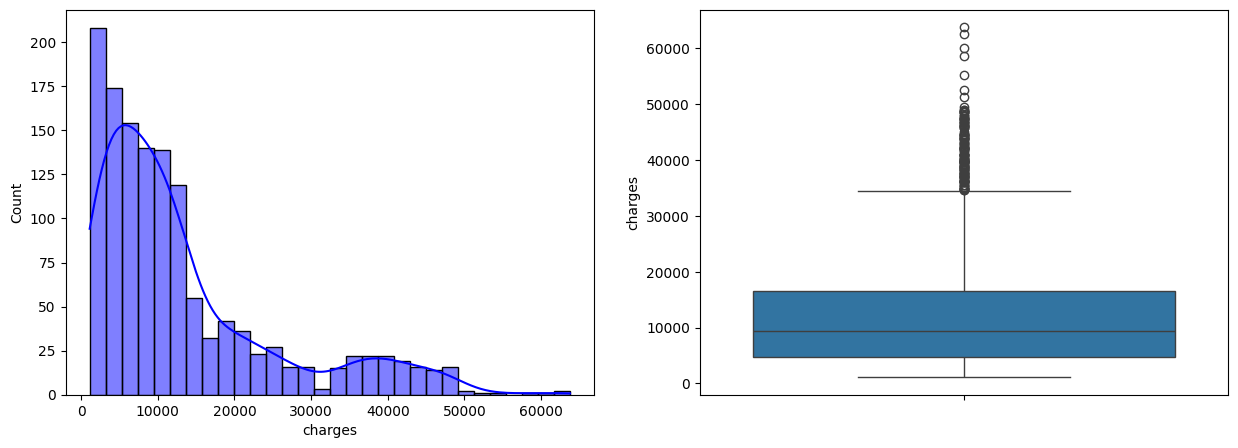

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x = "charges",data = df,kde=True,color="b")
plt.subplot(1,2,2)
sns.boxplot(y = "charges",data=df)

* Dengeli bir dağılım bulunmuyor çok fazla outlier var

<Axes: xlabel='age', ylabel='charges'>

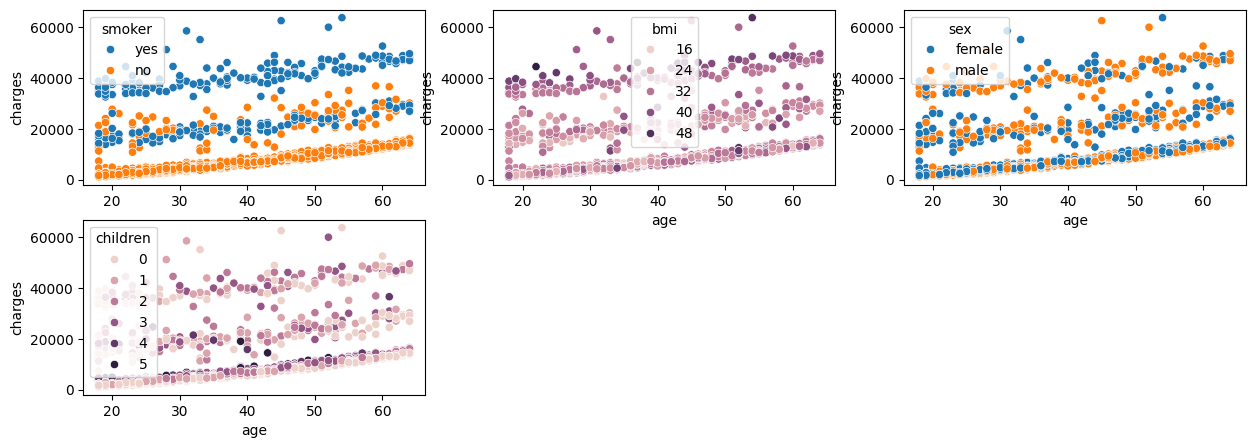

In [19]:
plt.figure(figsize = (15,5))
plt.subplot(2,3,1)
sns.scatterplot(x='age', y='charges',hue = "smoker", data=df)
plt.subplot(2,3,2)
sns.scatterplot(x='age', y='charges',hue = "bmi",data=df)
plt.subplot(2,3,3)
sns.scatterplot(x='age', y='charges',hue = "sex",data=df)
plt.subplot(2,3,4)
sns.scatterplot(x='age', y='charges',hue = "children",data=df)

In [20]:
df2 = df.copy()
encoder = OrdinalEncoder(categories=[["female", "male"]])
df2["sex"] = encoder.fit_transform(df2[["sex"]])
encoder = OrdinalEncoder(categories=[["no", "yes"]])
df2["smoker"] = encoder.fit_transform(df2[["smoker"]])

In [21]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,southwest,16884.92400
1,18,1.0,33.770,1,0.0,southeast,1725.55230
2,28,1.0,33.000,3,0.0,southeast,4449.46200
3,33,1.0,22.705,0,0.0,northwest,21984.47061
4,32,1.0,28.880,0,0.0,northwest,3866.85520


In [22]:
df2["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
encoder = OrdinalEncoder(categories=[['southwest', 'southeast', 'northwest', 'northeast']])
df2["region"] = encoder.fit_transform(df2[["region"]])

In [24]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,0.0,16884.92400
1,18,1.0,33.770,1,0.0,1.0,1725.55230
2,28,1.0,33.000,3,0.0,1.0,4449.46200
3,33,1.0,22.705,0,0.0,2.0,21984.47061
4,32,1.0,28.880,0,0.0,2.0,3866.85520


<Axes: >

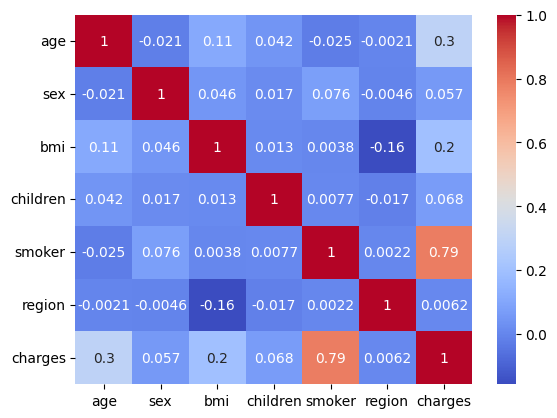

In [25]:
corr = df2.corr()
sns.heatmap(corr,annot = True,cmap = "coolwarm")

* Cinsiyet ve bölge chargeesi etilemiyor

In [26]:
df2.drop(columns=["sex","region"],inplace = True,axis = 1)

# ***Machine Learning***

In [27]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

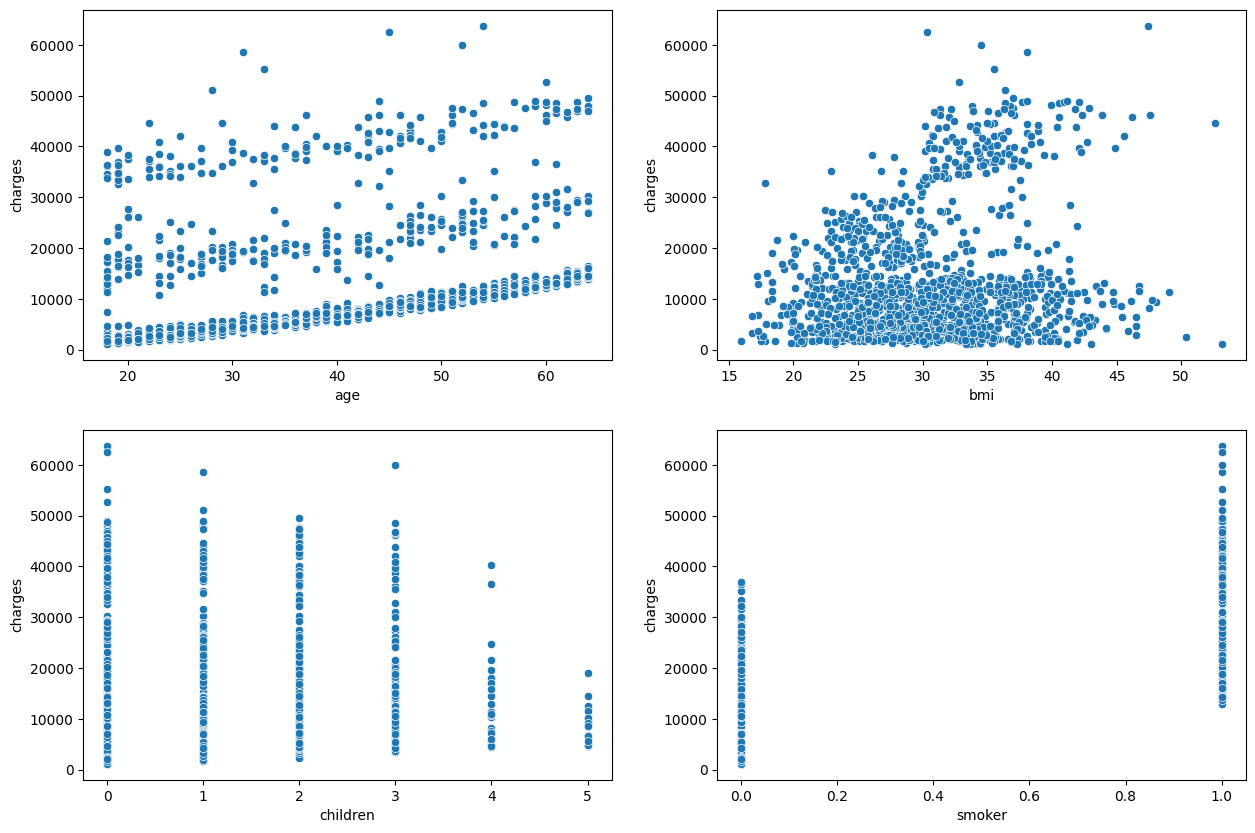

In [71]:
plt.figure(figsize = (15,10))
for i,j in enumerate(df2.columns[:-1]):
  plt.subplot(2,2,i+1)
  sns.scatterplot(x = j,y = "charges",data = df2)


In [28]:
x = df2.drop("charges",axis = 1)
y = df2["charges"]

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=42)

In [33]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Linear Regression

In [34]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
print("R2 score",r2)
print("MSE score",mse)
print("MEA score",mae)

R2 score 0.6923705219453666
MSE score 33948860.84184329
MEA score 4168.023269864937


In [35]:
model = LassoCV()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
print("R2 score",r2)
print("MSE score",mse)
print("MEA score",mae)

R2 score 0.6915231118926142
MSE score 33948739.756791934
MEA score 4167.258725491355


In [36]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
print("R2 score",r2)
print("MSE score",mse)
print("MEA score",mae)

R2 score 0.6923705219453666
MSE score 33948860.84184329
MEA score 4168.023269864937


In [38]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
print("R2 score",r2)
print("MSE score",mse)
print("MEA score",mae)

R2 score 0.840301928965463
MSE score 22485193.58942134
MEA score 2551.3830109823625
